<a href="https://colab.research.google.com/github/b-edward/colaboratory/blob/main/Copy_of_Bell_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

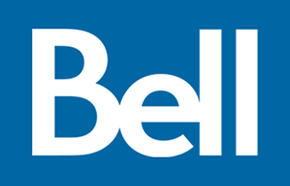

---

#**Bell Machine Learning Workshop**

## Learning Objectives
* Learn how to explore a dataset with python
* Fit a simple but powerful machine learning model to predict bike rental demand

## Dataset - Seoul Bike Rental 

We will be taking a look at the Seoul Bike Rental dataset, which can be found in the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand). 

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


In [ ]:
# retrieve the dataset from UCI Machine Learning Repo
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv

--2021-09-23 22:09:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604166 (590K) [application/x-httpd-php]
Saving to: ‘SeoulBikeData.csv’

SeoulBikeData.csv   100%[===================>] 590.01K  --.-KB/s    in 0.1s    

2021-09-23 22:09:30 (4.22 MB/s) - ‘SeoulBikeData.csv’ saved [604166/604166]



## **Dataset & Feature exploration**

Let's take a look at a few useful libraries for exploring this dataset, such as pandas, matplotlib, and seaborn.

# New Section

### Pandas
The first library that we will be using is perfect for handling data in tabular format, such as the csv we just retrieved. Let's get to grips with a few useful commands


In [ ]:
import pandas as pd

The default pandas object is called a dataframe, which is essentially just a table. Let's read our csv into a dataframe.

In [ ]:
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
df.head() # displays the first 5 rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# display some basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Next we might want to view some basic statistics about the numerical features in our dataset, such as the count, mean, std etc...

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Matplotlib & Seaborn
The next two libraries provide useful ways to visualize data. By creating visuals we can gain a better understanding of our data and discover which features will be most useful when predicting rental demand.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  

Let's first take a look at the average number of bike rentals for each hour of the day, seeing as we have this feature in our dataset. We'll use matplotlib to set the size of the overall figure, and seaborn to create the graph. (Note: seaborn is an extension of matplotlib, so they work together nicely)

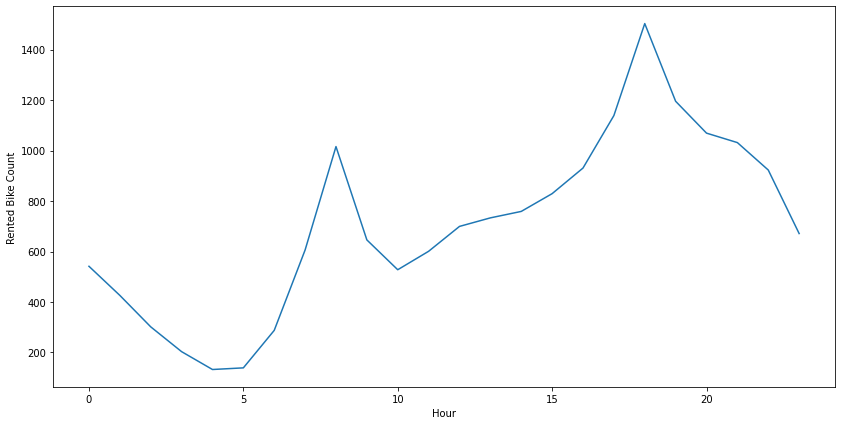

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', estimator='mean', ci=None)
plt.show()

There are clear spikes in the data around hour 7/8 and 17/18. This is likely due to these times being peak times for commuting. We can also see that bike rentals drop to their lowest during the night, which is expected.

It would be nice to separate this by day of the week, perhaps there is a different pattern on weekdays vs weekends. Let's add day-of-the-week as a feature to our data.

In [ ]:
from datetime import datetime

# create a function for creating dayofweek feature
def dayofweek(date):
    return datetime.strptime(date, '%d/%m/%Y').weekday()

In [ ]:
# create a new feature in our dataframe called dayofweek
df['dayofweek'] = list(map(dayofweek, df.Date.values))

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dayofweek
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4


Let's try visualizing bike rentals again, but separating by dayofweek

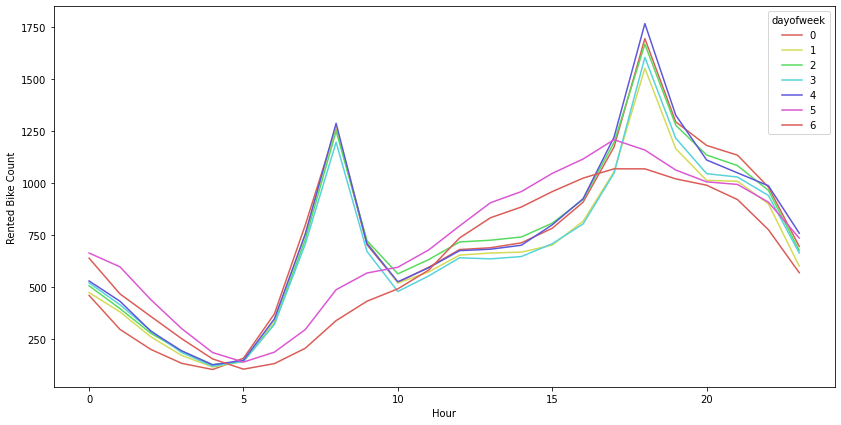

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', estimator='mean', hue='dayofweek', palette='hls', ci=None)
plt.show()

Interesting, we can see that days 5 and 6 have a different pattern than the first 5 days. This indicates that we do indeed see a difference depending on whether it's a weekday vs weekend. The distinctive peaks around commute time are not present at the weekend. This will be useful information to know when predicting the bike rental demand.

Let's try taking a look at the different seasons and holidays.

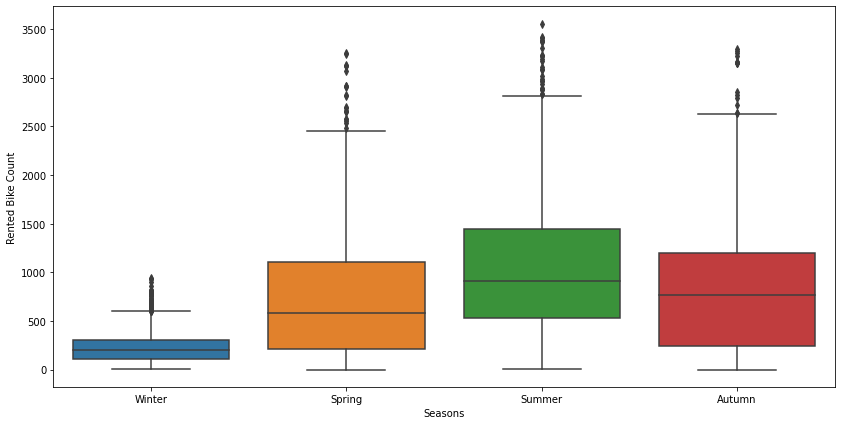

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Seasons', y='Rented Bike Count')
plt.show()

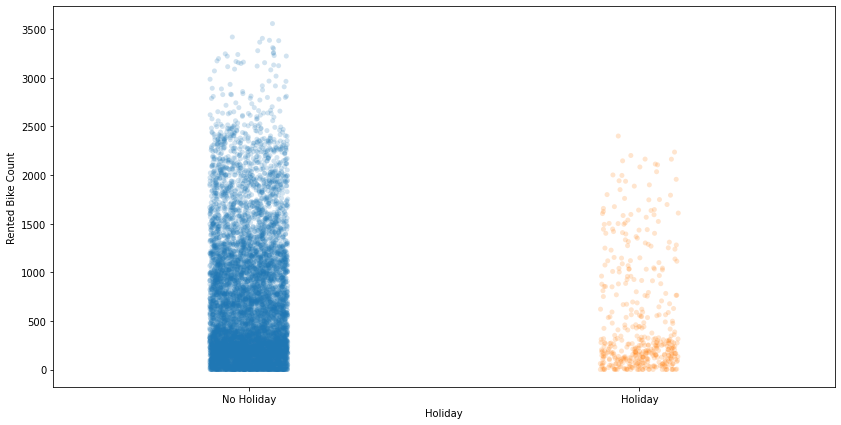

In [ ]:
plt.figure(figsize=(14, 7))
sns.stripplot(data=df, x='Holiday', y='Rented Bike Count', alpha=0.2)
plt.show()

We can see that Summer is the month with the largest number of bike rentals, and Winter being the smallest. Let's explore a few other features in our dataset and see if we can correlate them to the number of bike rentals.

In [ ]:
# define function for plotting different columns against the rented bike count
def plot_column_corrs(df, cols):
    plt.figure(figsize=(30, 10))
    for i, col in enumerate(cols):
        col_data = df[[col, 'Rented Bike Count']].groupby(col).agg('mean').reset_index()
        ax = plt.subplot(2, 4, i+1)
        ax.scatter(col_data[col].values, col_data['Rented Bike Count'].values)
        ax.set_xlabel(col)
        ax.set_ylabel('Rented Bike Count')

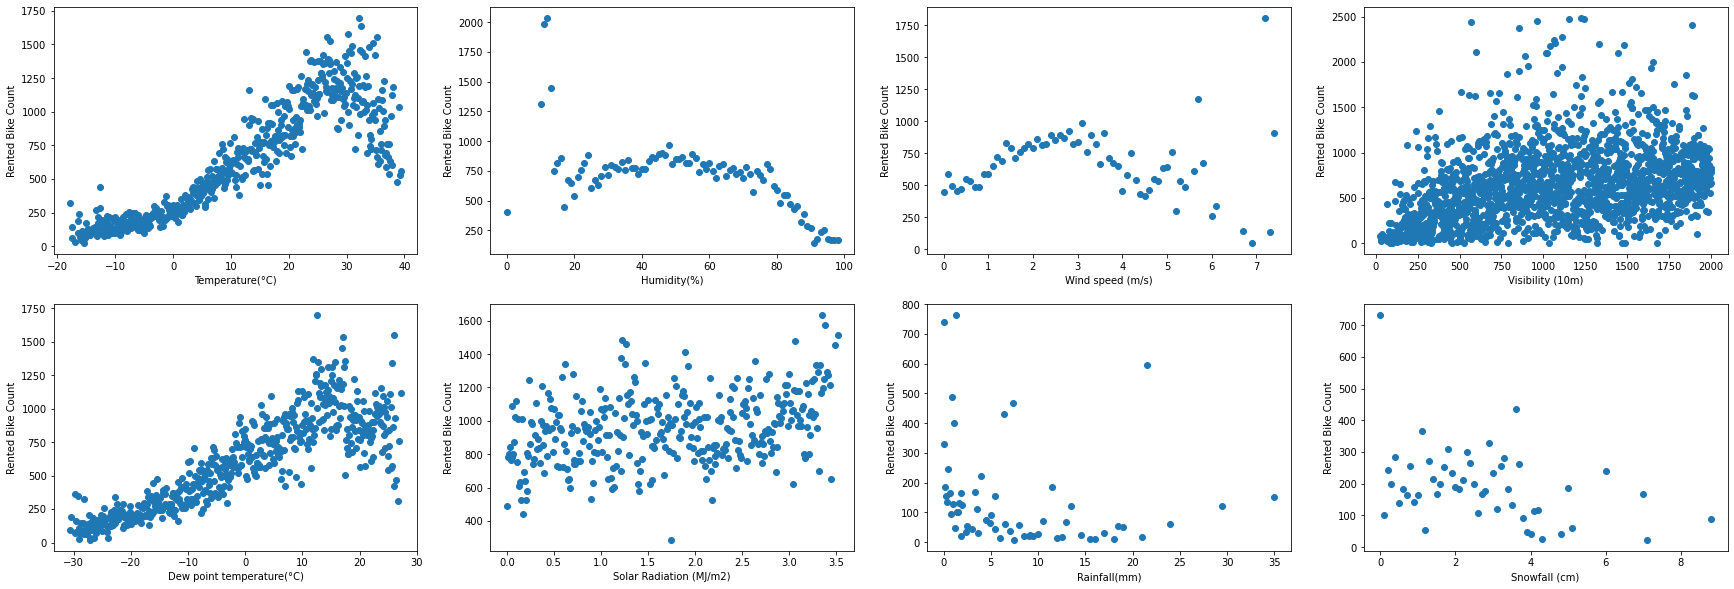

In [ ]:
cols = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']
plot_column_corrs(df, cols)

### Pearson Correlation Coefficient

The Pearson Correlation Coefficient is a metric we can use to measure the linear relationship between two features. The Pearson Correlation matrix below shows the direction and strength of the relationship between any two variables in our dataset.

The Pearson Correlation is often denoted as *r* and ranges from -1 to 1.

*   -1: Strong Negative Correlation
*   0: No Correlation
*   1: Strong Positive Correlation


**We are interested in relationship between the rented bike count and other variables.**

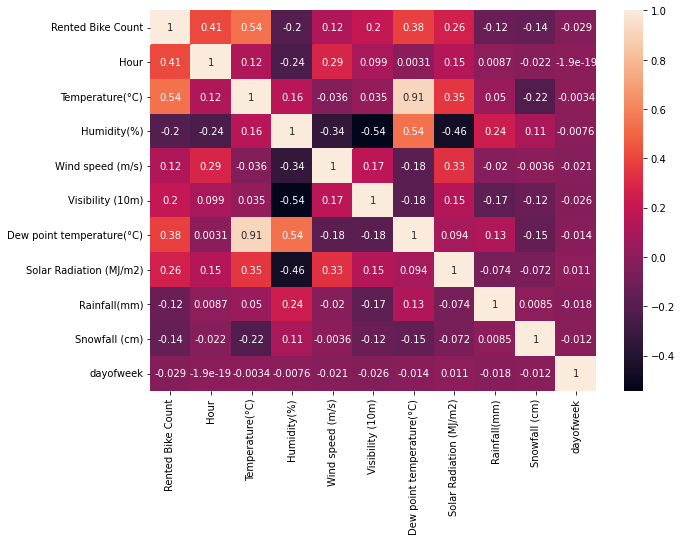

In [ ]:
plt.figure(figsize=(10, 7))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Strongest Positive Correlation with Rented Bike Count:

*   Rented Bike Counts and Temperature (0.54)

Strongest Negative Correlation with Rented Bike Count:

*   Rented Bike Counts and Humidity (-0.2)

 

**Code reusability (always a plus)** : Let's use the code above to plot again these two variables (Temperature, Humidity) against Rented Bike Counts.


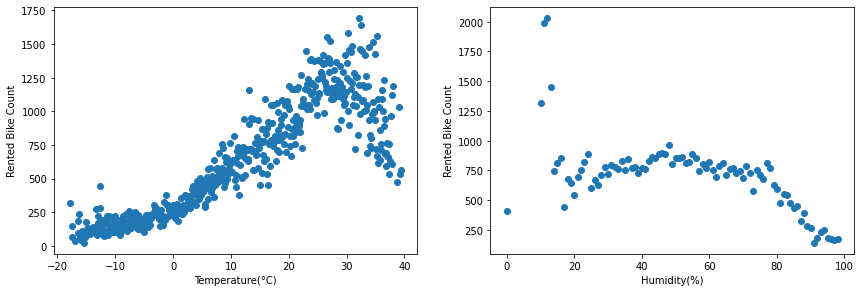

In [ ]:
cols = ['Temperature(°C)', 'Humidity(%)']
plot_column_corrs(df, cols)

Information provided by running above correlation analysis.

*   **Temperature**: The higher the temperature, the more bikes are rented in Seoul (thus, the positive correlation of 0.54). However, it is not perfectly positively correlated as we can see after 30 degrees, bike rentals decrease again.

*   **Humidity**: The higher the humidity the less bikes are rented in Seoul (thus, the negative correlation of 0.2). However, it is also not perfectly negatively correlated as we can see that the downward bike rental trend is most pronounced starting with a humidity of around 60%.

## **Predicting Number of Bike Rentals**

We will now look at how to predict future values for the number of bike rentals. This is an important task as it can help ensure there is a stable supply of bikes at all times throughout the day, adapting to meet higher demands at peak times.

### What is Machine Learning?

At a high level, the aim of supervised machine learning models is to learn a function, $f$, that maps inputs $x$ to outputs $y$. Our inputs in this example  are features such as temperature, and our output is the number of rented bikes.

* $ f(x) = y $

* $ f(temperature, hour, humidity....) = no. rented bikes $

We don't know what this function will be, and it would be pretty hard to define manually, so it's the job of the machine learning model to figure that out. This process of learning the function is called training the model. This is a shift away from traditional programming as we don't explicitly tell the program how to use the inputs to generate the outputs, we simply provide the model with many examples of input-output pairs and the model learns the function that maps them automatically. 



### Training a model



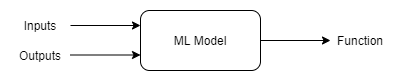

In order to train the model we must create a number of input-output pairs from our data. First step is to split our data into our training and test sets, with a larger proportion of data going to the training set. The reason we don't train on the whole dataset is because we want to see how the model will perform on unseen data, which we can use to get a measure of performance. We can use a 70%-30% split; or an 80%-20% split or other.


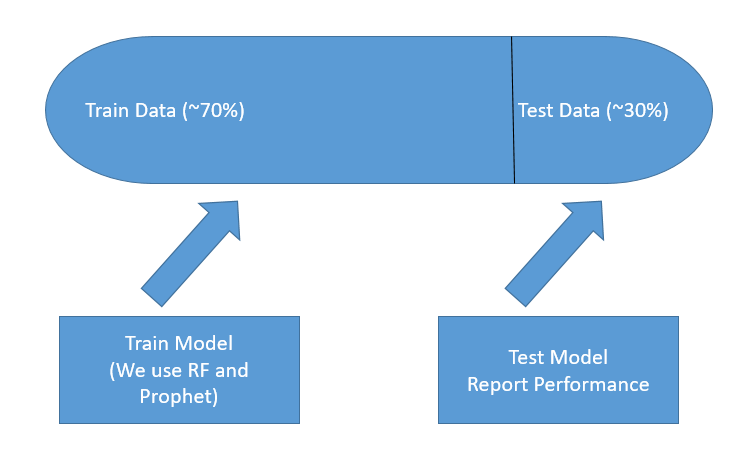

We will now fit two different models to this data. This is to show two different ways we could approach this forecasting challenge and discuss their pros and cons. The models are:

*   Random Forest
*   FBProphet

### Model 1 - Random Forest
We will fit a supervised machine learning model called a [Random Forest](https://en.wikipedia.org/wiki/Random_forest) to the historical data in order to predict future values. It uses the features of the dataset, such as temperature/season/rainfall/time-of-day, in order to predict what the number of rented bikes will be. A Random Forest is actually a collection of simpler models called decision trees. Once each decision tree has produced a prediction, these are all averaged in order to obtain the final prediction.

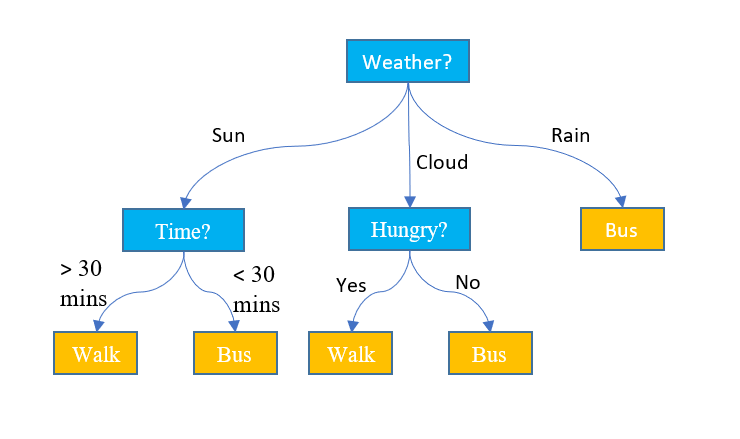

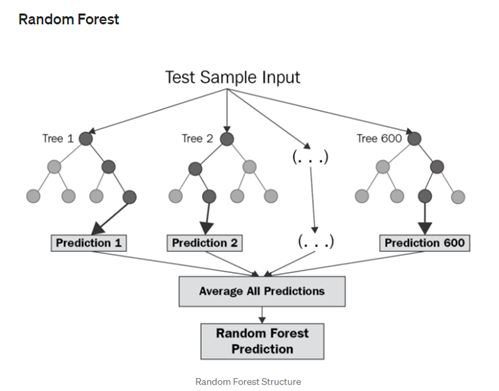

(Aside: You may ask why we bother doing all this averaging of decision trees, and the answer is that it makes the model a bit more robust to [overfitting](https://en.wikipedia.org/wiki/Overfitting) during training).

#### Implementation

The steps to predicting the number of rented bikes are as follows:
1. Prepare the data, adding/removing features and getting them in the correct format
2. Split the dataset into train and test sets
3. Turning the train and test sets into input->output pairs
4. Train the model and measure performance on the test set

**1. Prepare the data**
* Remove the 'Date' feature, as we will not need this when predicting (only the hour and day of the week are required)
* Encode our categorical features from string to integer types. We encode these features because the model does not understand inputs in string format such as 'Winter', we need to represent them as a number. We will use a labelencoder to accomplish this. It will convert the seasons from ['Winter', 'Spring', 'Summer', 'Fall'] to [0, 1, 2, 3].

In [ ]:
# remove date feature
df_prepared = df.drop('Date', axis=1)

sklearn is a very popular library that has implementations for many statistical and machine learning models, we will use it to encode the categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder
# encode the categorical features
categorical_cols = ['Seasons', 'Holiday', 'Functioning Day']
for col in categorical_cols:
    encoder = LabelEncoder()
    df_prepared[col] = encoder.fit_transform(df_prepared[col])
    print({l: i for i, l in enumerate(encoder.classes_)})

{'Autumn': 0, 'Spring': 1, 'Summer': 2, 'Winter': 3}
{'Holiday': 0, 'No Holiday': 1}
{'No': 0, 'Yes': 1}


**2. Split the dataset into train and test sets**

We will use all the data up until the last 24hrs to train the model, reserving the last day for testing.

In [ ]:
import numpy as np # this is another very popular library for numerical computing in python
def plot_week(df, pred=None):
    plt.figure(figsize=(18, 7))
    if pred is not None:
        plt.plot(np.arange(168), df['Rented Bike Count'].values[-168:], label='True')
        plt.plot(np.arange(144, 168), pred, label='Predicted')
        plt.legend()
    else:
        plt.plot(np.arange(168), df['Rented Bike Count'].values[-168:])
    plt.title('1 Week')
    plt.ylabel('Rented Bike Count')
    plt.xlabel('Hour')
    plt.axvline(144, color='red', linestyle='dashed')
    plt.show()

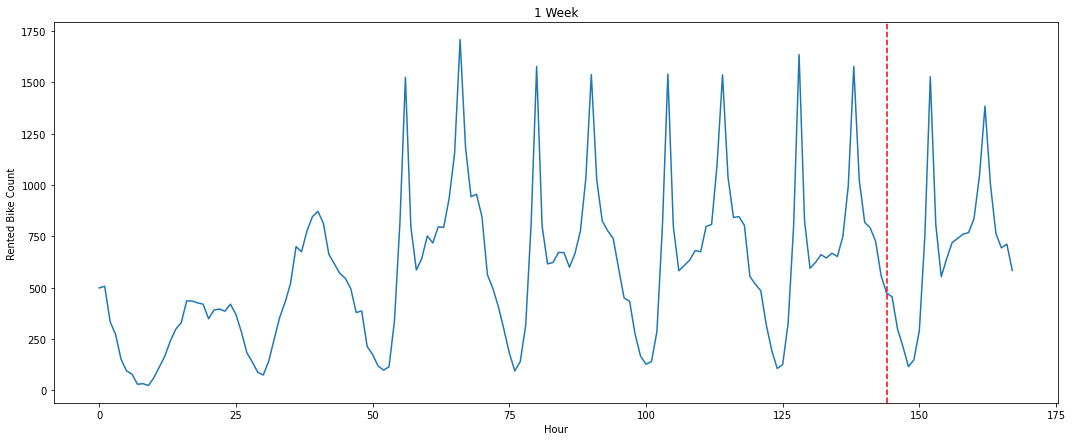

In [ ]:
plot_week(df)

In [ ]:
# split into train and test sets
train = df_prepared.iloc[:-24, :]
test = df_prepared.iloc[-24:, :]
print(train.shape, test.shape)

(8736, 14) (24, 14)


**3. Turn training and test sets into input->output pairs**

We will represent (input->output) with (x -> y). The model will learn a mapping from our features (temp, hour, humidity) to our output (no. rented bikes)

In [ ]:
X_train = train.drop('Rented Bike Count', axis=1) # input
y_train = train['Rented Bike Count'] # output
X_test = test.drop('Rented Bike Count', axis=1) # input
y_test = test['Rented Bike Count'] # output
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8736, 13) (8736,) (24, 13) (24,)


In [ ]:
print(f'features:\n-------------\n{X_train.iloc[0, :]}\n\noutputs\n-------------\nno. rented bikes: {y_train[0]}')

features:
-------------
Hour                            0.0
Temperature(°C)                -5.2
Humidity(%)                    37.0
Wind speed (m/s)                2.2
Visibility (10m)             2000.0
Dew point temperature(°C)     -17.6
Solar Radiation (MJ/m2)         0.0
Rainfall(mm)                    0.0
Snowfall (cm)                   0.0
Seasons                         3.0
Holiday                         1.0
Functioning Day                 1.0
dayofweek                       4.0
Name: 0, dtype: float64

outputs
-------------
no. rented bikes: 254


**4. Train the model and measure performance on the test set**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train) # arguments are our (inputs, outputs)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred = rf.predict(X_test)

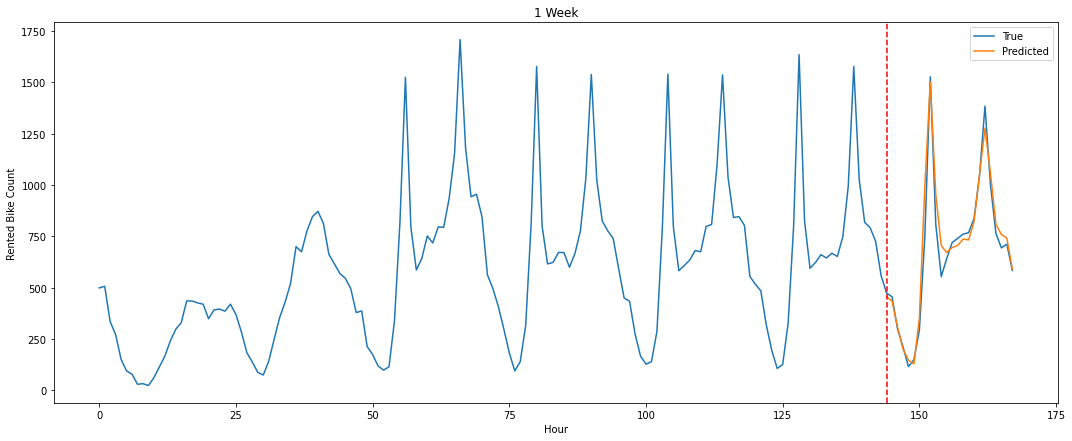

In [ ]:
plot_week(df, pred)

### Model 2 - FBProphet


One drawback of the Random Forest approach is that for all future timesteps, we need to have values for the features we use to predict no. rented bikes. For example, we need to have accurate values for the future temperature, humidity etc, all of which can affect the accuracy of the rental bike model.

Another approach is to model the time series directly. This means that instead of using 'other' variables to predict the bike rent count (such as temperature, season, humitidy etc...), we focus solely on the rented bike count value, using historical values of the rented bike count to predict future values.

We can decompose a time series into 4 constituent parts:

1. Level - The baseline value for the series if it were a straight line.
2. Trend - The optional and often linear increasing or decreasing behavior of the series over time.
3. Seasonality - The optional repeating patterns or cycles of behavior over time.
4. Noise - The optional variability in the observations that cannot be explained by the model.

All time series have a level, most have noise, and the trend and seasonality are optional.

We can linearly combine these four parts to get our final prediction:

$ y (predicted bike rent count) = level + trend + seasonality + noise $



https://machinelearningmastery.com/time-series-forecasting/

#### Implementation

The model we're going to use is called [Prophet](https://facebook.github.io/prophet/), which implements the approach described above at a high level with a lot of extra performance tweaks. It is developed by Facebook and is open source. It is a very popular and effective model for time series forecasting.

The steps for forecasting the rented bike count using this model are as follows:
1. Prepare the data
2. Split into train and test sets
3. Train the model and measure performance on the test set

*Note: we don't have to manually create input->output pairs for this model. The fbprophet library handles a lot of the data preparation for us, so we only need to provide the train set in its current form*

In [ ]:
from fbprophet import Prophet
from pandas import to_datetime

**1. Prepare the data**

Let's first isolate the only two features we need for this model, the timestamp and the number of rented bike counts

In [ ]:
df['Hour'] = df['Hour'].astype(str)
df['Date_full'] = [df.Date.values[i] + ' ' + df.Hour.values[i] + ':' + '00:00' for i in range(len(df.Date.values))]
df_ts = df.loc[:, ['Date_full', 'Rented Bike Count']]
df_ts['Date_full'] = to_datetime(df_ts['Date_full'])
df_ts.head()

,Date_full,Rented Bike Count
0,2017-01-12 00:00:00,254
1,2017-01-12 01:00:00,204
2,2017-01-12 02:00:00,173
3,2017-01-12 03:00:00,107
4,2017-01-12 04:00:00,78


**2. Split into train and test sets**

In [ ]:
# prepare expected column names, prophet expects them to be called ds and y
df_ts.columns = ['ds', 'y']
# Split train/test (we'll use about three weeks to train)
train = df_ts.iloc[-528:-24, :]
test = df_ts.iloc[-24:, :]
print(train.shape, test.shape)

(504, 2) (24, 2)


**3. Train the model and measure performance on test set**

In [ ]:
# define and fit the model
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
pred = model.predict(test)
# pred output - note the lower and upper bound, these can be used to provide confidence intervals for your forecast
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-11-30 00:00:00,653.251764,308.757270,931.046976,653.251764,653.251764,-28.690948,-28.690948,-28.690948,-136.798660,-136.798660,-136.798660,108.107712,108.107712,108.107712,0.0,0.0,0.0,624.560815
1,2018-11-30 01:00:00,653.075714,237.083579,854.767834,653.075714,653.075714,-92.684524,-92.684524,-92.684524,-199.282559,-199.282559,-199.282559,106.598034,106.598034,106.598034,0.0,0.0,0.0,560.391190
2,2018-11-30 02:00:00,652.899665,50.664416,698.022318,652.899665,652.899665,-253.834992,-253.834992,-253.834992,-358.481525,-358.481525,-358.481525,104.646533,104.646533,104.646533,0.0,0.0,0.0,399.064673
3,2018-11-30 03:00:00,652.723615,-111.183911,533.312012,652.723615,652.723615,-446.551057,-446.551057,-446.551057,-548.784971,-548.784971,-548.784971,102.233914,102.233914,102.233914,0.0,0.0,0.0,206.172559
4,2018-11-30 04:00:00,652.547566,-188.256699,447.063487,652.547566,652.547566,-533.152826,-533.152826,-533.152826,-632.495773,-632.495773,-632.495773,99.342947,99.342947,99.342947,0.0,0.0,0.0,119.394740


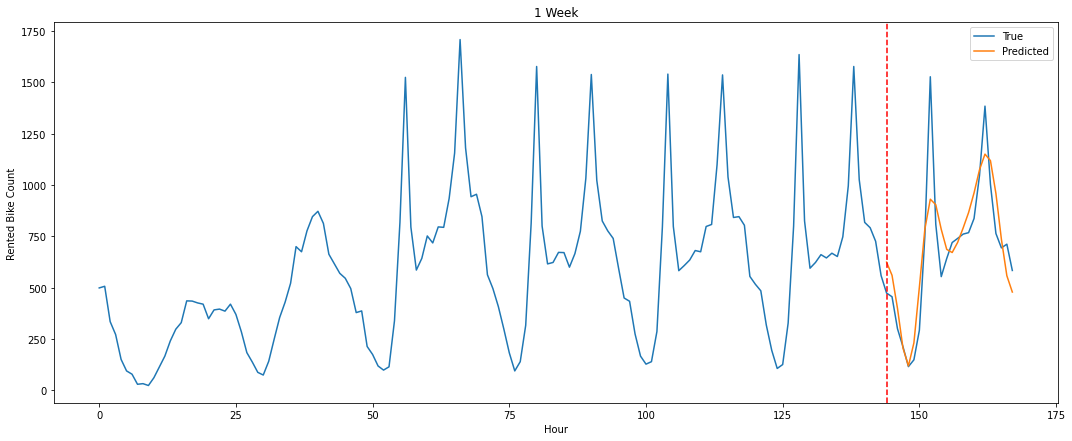

In [ ]:
plot_week(df, pred['yhat'])